BoxPlots for All patients

In [2]:
# Import Modules
import sys
sys.path.append("..") #give this script access to all modules in parent directory
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
from scipy.io import loadmat
import scipy
from scipy.stats import skew
from Data_Cleaning import preprocess
import Actigraph_Metrics

C:\Users\jakes\AppData\Local\Temp\ipykernel_16196\412899740.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# signal parameters
freq = 100 #signal is 100hz

Define Functions

In [4]:
def sbs_boxplot(sbs, x_mag, window_size=100, show_outlier=True):
    # Output Boxplot for each SBS Score
    sbs_mad_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}
    sbs_skew_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}
    sbs_stdev_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}
    sbs_mean_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}


    # Populate the dictionary with MAD values
    for i, sbs_value in enumerate(sbs):    
        signal = Actigraph_Metrics.VecMag_MAD(x_mag[i,:], window_size)
        sbs_mad_dict[sbs_value].extend(signal)
        sbs_skew_dict[sbs_value].append(skew(signal, axis = 0, bias = True))
        sbs_stdev_dict[sbs_value].append(np.std(signal))
        sbs_mean_dict[sbs_value].append(np.mean(signal))
        
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

    # Box plot: this version will show the outliers too
    ax[0,0].boxplot([sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]], labels=['-1', '0', '1', '2'], showfliers=show_outlier)
    ax[0,1].boxplot([sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]], labels=['-1', '0', '1', '2'], showfliers=show_outlier)
    ax[1,0].boxplot([sbs_mean_dict[-1], sbs_mean_dict[0], sbs_mean_dict[1], sbs_mean_dict[2]], labels=['-1', '0', '1', '2'], showfliers=show_outlier)
    ax[1,1].boxplot([sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]], labels=['-1', '0', '1', '2'], showfliers=show_outlier)

    #label axes
    ax[0,0].set_xlabel('SBS Score')
    ax[0,0].set_ylabel('MAD')
    ax[0,1].set_xlabel('SBS Score')
    ax[0,1].set_ylabel('Skew')
    ax[1,0].set_xlabel('SBS Score')
    ax[1,0].set_ylabel('Mean')
    ax[1,1].set_xlabel('SBS Score')
    ax[1,1].set_ylabel('Standard Deviation')
    return ax, sbs_mad_dict, sbs_mean_dict, sbs_stdev_dict, sbs_skew_dict


def report_quartiles(sbs_mad_dict):
    # print quartiles and 90th percentile
    quartiles = {}
    for sbs_value, mad_list in sbs_mad_dict.items():
        quartiles[sbs_value] = {
            'Q1': np.percentile(mad_list, 25),
            'Q2': np.percentile(mad_list, 50),
            'Q3': np.percentile(mad_list, 75),
            '90th Percentile': np.percentile(mad_list, 90)
        }

    # Print quartiles and 90th percentile
    for sbs_value, values in quartiles.items():
        print(f"SBS Score: {sbs_value}")
        print(f"Q1: {values['Q1']}")
        print(f"Q2 (Median): {values['Q2']}")
        print(f"Q3: {values['Q3']}")
        print(f"90th Percentile: {values['90th Percentile']}")
        print()

Load All Patient Data

In [10]:
#data_dir = 'C:/Users/sidha/OneDrive/Sid Stuff/PROJECTS/iMEDS Design Team/Data Analysis/PedAccel/data_analysis/PythonPipeline/PatientData'

data_dir = r'C:\Users\jakes\Documents\DT 6 Analysis\PythonCode\PedAccel\data_analysis\PythonPipeline\PatientData'
#set params
slice_size_min = 15
lead_time = 10
window_size = 100 #100 is 1 second worth of time

preprocess.load_and_segment_data(data_dir, slice_size_min, lead_time) #take sbs csv and accel gt3x to create a .mat file with vector magnitudes

Processing: Patient11
Loading actigraphy data
(121728900, 6)
['Timestamp', 'X', 'Y', 'Z']
Loading SBS data
[datetime.datetime(2024, 1, 31, 0, 0), '1/31/2024 12:00:00 AM', -1, 'Unnamed: 3', 'N']


ValueError: SBS column not found in the excel file

25
25
89999


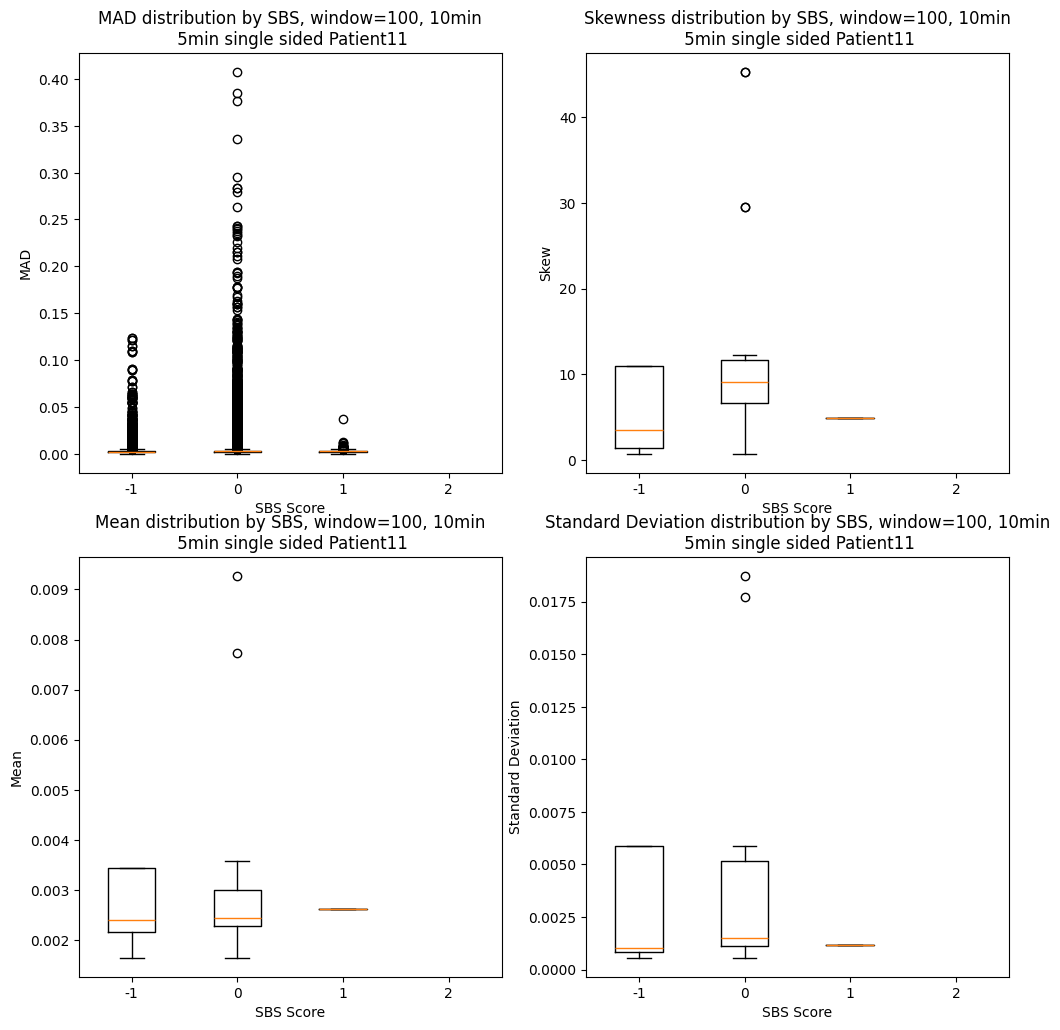

29
29
89999


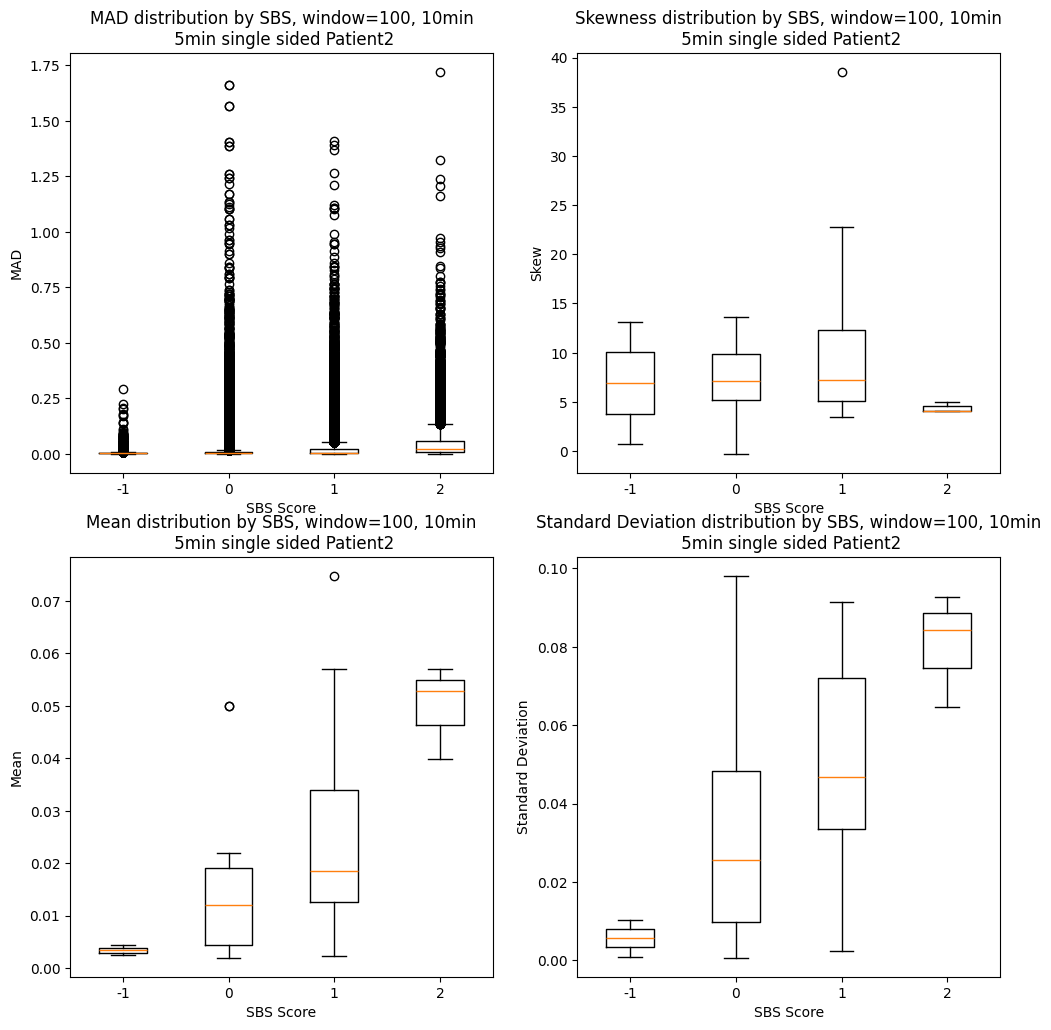

8
8
89999


KeyboardInterrupt: 

In [37]:
#There is no error handling in place, the .mat file must exist
for patient in os.listdir(data_dir):
        # filter out non-directories
        patient_dir = os.path.join(data_dir, patient)
        if os.path.isdir(patient_dir):
            data_filepath = os.path.join(patient_dir, f'{patient}_{lead_time}MIN_{window_size - lead_time}MIN.mat')
        data = loadmat(data_filepath)
        x_mag = data["x_mag"]
        sbs = data["sbs"].flatten()
        print(len(x_mag))
        print(len(sbs))
        print(len(x_mag[0]))
        ax, sbs_mad_dict, sbs_mean_dict, sbs_stdev_dict, sbs_skew_dict = sbs_boxplot(sbs, x_mag, window_size, show_outlier=True)
        ax[0,0].set_title('MAD distribution by SBS, window=100, 10min\n 5min single sided ' + patient)
        ax[0,1].set_title('Skewness distribution by SBS, window=100, 10min\n 5min single sided ' + patient)
        ax[1,0].set_title('Mean distribution by SBS, window=100, 10min\n 5min single sided ' + patient)
        ax[1,1].set_title('Standard Deviation distribution by SBS, window=100, 10min\n 5min single sided ' + patient)
        plt.show()
        #report_quartiles(sbs_mad_dict)

